# Master Table Creation

This notebook is for creating and working with the master table for the founder success prediction project.

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [29]:
people_csv = 'df_people_cleaned.csv'
jobs_csv = 'df_jobs_cleaned.csv'
degrees_csv = 'df_degrees_cleaned.csv'
organizations_csv = 'df_organizations_cleaned.csv'
funding_csv = 'df_funding_rounds_cleaned.csv'
ipo_csv = 'df_ipos_cleaned.csv'
investments_csv = 'df_investments_cleaned.csv'
acquisitions_csv = 'df_acquisitions_cleaned.csv'

In [3]:
people_df = pd.read_csv(people_csv)

We are dropping 'first_name' and 'last_name' because the dataset already has a 'name' column that contains the concatenation of first and last names. We also drop 'type' as it is unnecessary.


In [4]:

# Drop specified columns
columns_to_drop = ['type', 'first_name', 'last_name']

# Check which columns exist in the dataframe
existing_columns = [col for col in columns_to_drop if col in people_df.columns]
missing_columns = [col for col in columns_to_drop if col not in people_df.columns]

if existing_columns:
    people_df = people_df.drop(columns=existing_columns)
    print(f"Successfully dropped columns: {existing_columns}")
    print(f"New shape: {people_df.shape}")
    print(f"Remaining columns: {list(people_df.columns)}")
else:
    print("No specified columns found in the dataframe")

if missing_columns:
    print(f"Columns not found in dataframe: {missing_columns}")

print("\nFirst few rows after dropping columns:")
display(people_df.head())

Successfully dropped columns: ['type', 'first_name', 'last_name']
New shape: (25094, 19)
Remaining columns: ['uuid', 'name', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'gender', 'country_code', 'state_code', 'region', 'city', 'featured_job_organization_uuid', 'featured_job_organization_name', 'featured_job_title', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url']

First few rows after dropping columns:


,uuid,name,permalink,cb_url,rank,created_at,updated_at,gender,country_code,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,138478.0,2007-05-25 14:04:16,2024-10-14 05:43:04,male,NaN,NaN,NaN,NaN,96d7b685-3deb-4f31-9ef4-de87b2a99bc2,Taco Johns,Cmo,https://www.facebook.com/kevinbflaherty,https://www.linkedin.com/in/kevinflaherty,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/843825a5515449079b5bb4f1ef94313d
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,18576.0,2007-05-26 02:33:03,2022-02-24 12:24:29,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,missing,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,https://images.crunchbase.com/image/upload/t_cb-default-original/oaxfoww3m0u0lwdovzv3
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,ian-wenig,https://www.crunchbase.com/person/ian-wenig,291241.0,2007-05-26 02:34:53,2021-03-23 10:25:04,male,NaN,NaN,NaN,NaN,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Vp Business Development,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1442309935/yiajbpfbxyopc5l4zs4t.png
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,owen-byrne,https://www.crunchbase.com/person/owen-byrne,609315.0,2007-05-26 03:06:45,2022-04-08 19:52:41,male,USA,CA,California,Mountain View,NaN,NaN,NaN,missing,https://www.linkedin.com/in/ojbyrne,http://twitter.com/owenbyrne,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180229/eb6f898475c0bef4c624ed44c9add19a.jpg


In [5]:
# Prefix all column names with 'person_' unless they already start with 'person_'
people_df = people_df.rename(columns=lambda col: col if col.startswith('person_') else f'person_{col}')

# Show updated columns
print("Updated column names with 'person_' prefix:")
print(list(people_df.columns))

Updated column names with 'person_' prefix:
['person_uuid', 'person_name', 'person_permalink', 'person_cb_url', 'person_rank', 'person_created_at', 'person_updated_at', 'person_gender', 'person_country_code', 'person_state_code', 'person_region', 'person_city', 'person_featured_job_organization_uuid', 'person_featured_job_organization_name', 'person_featured_job_title', 'person_facebook_url', 'person_linkedin_url', 'person_twitter_url', 'person_logo_url']


In [6]:
# Fill missing values with mode for specified columns
print("FILLING MISSING VALUES WITH MODE")
print("=" * 50)

# List of columns to fill with mode (using the updated names with 'person_' prefix)
columns_to_fill = [
    'person_gender',
    'person_state_code',
    'person_region',
    'person_city',
    'person_featured_job_title',
    'person_country_code'
]

# Store original null counts for comparison
original_nulls = {}
for col in columns_to_fill:
    if col in people_df.columns:
        original_nulls[col] = people_df[col].isnull().sum()

print("Before filling missing values:")
for col in columns_to_fill:
    if col in people_df.columns:
        print(f"{col:<30} | {original_nulls[col]:,} null values")

print("\nFilling missing values with mode...")
print("-" * 30)

# Fill missing values with mode for each column
for col in columns_to_fill:
    if col in people_df.columns:
        mode_value = people_df[col].mode()
        if len(mode_value) > 0:
            mode_val = mode_value[0]
            people_df[col] = people_df[col].fillna(mode_val)
            print(f"{col}: Filled with mode value '{mode_val}'")


FILLING MISSING VALUES WITH MODE
Before filling missing values:
person_gender                  | 27 null values
person_state_code              | 12,787 null values
person_region                  | 8,747 null values
person_city                    | 9,152 null values
person_featured_job_title      | 4,857 null values
person_country_code            | 7,999 null values

Filling missing values with mode...
------------------------------
person_gender: Filled with mode value 'male'
person_state_code: Filled with mode value 'CA'
person_region: Filled with mode value 'California'
person_city: Filled with mode value 'San Francisco'
person_featured_job_title: Filled with mode value 'Ceo'
person_country_code: Filled with mode value 'USA'


In [7]:
# Simple Null Value Check for All Columns
print("NULL VALUE SUMMARY")
print("=" * 50)
print(f"Dataset shape: {people_df.shape}")
print("\nNull values per column:")
print("-" * 25)

# Get null counts and percentages
null_info = pd.DataFrame({
    'Column': people_df.columns,
    'Null_Count': people_df.isnull().sum().values,
    'Null_Percentage': (people_df.isnull().sum() / len(people_df) * 100).round(2).values
})

# Display all columns with their null information
for idx, row in null_info.iterrows():
    status = "✅ Complete" if row['Null_Count'] == 0 else f"⚠️  {row['Null_Count']} nulls ({row['Null_Percentage']}%)"
    print(f"{row['Column']:<35} | {status}")

# Quick summary
total_nulls = people_df.isnull().sum().sum()
total_values = people_df.size
print(f"\nOVERALL SUMMARY:")
print(f"Total null values: {total_nulls:,}")
print(f"Total values: {total_values:,}")
print(f"Overall null percentage: {(total_nulls/total_values*100):.2f}%")

NULL VALUE SUMMARY
Dataset shape: (25094, 19)

Null values per column:
-------------------------
person_uuid                         | ✅ Complete
person_name                         | ✅ Complete
person_permalink                    | ⚠️  1 nulls (0.0%)
person_cb_url                       | ⚠️  1 nulls (0.0%)
person_rank                         | ✅ Complete
person_created_at                   | ✅ Complete
person_updated_at                   | ✅ Complete
person_gender                       | ✅ Complete
person_country_code                 | ✅ Complete
person_state_code                   | ✅ Complete
person_region                       | ✅ Complete
person_city                         | ✅ Complete
person_featured_job_organization_uuid | ⚠️  4855 nulls (19.35%)
person_featured_job_organization_name | ⚠️  4855 nulls (19.35%)
person_featured_job_title           | ✅ Complete
person_facebook_url                 | ✅ Complete
person_linkedin_url                 | ✅ Complete
person_twitter_url      

In [8]:

# Fill specific columns' nulls with "Not Available"
columns_to_fill_na = ['person_permalink', 'person_cb_url']

# Ensure columns exist before filling
existing_columns = [col for col in columns_to_fill_na if col in people_df.columns]

if existing_columns:
    people_df[existing_columns] = people_df[existing_columns].fillna("Not Available")
    print(f"Filled nulls with 'Not Available' in columns: {existing_columns}")
else:
    print(" None of the specified columns were found in the dataset.")

Filled nulls with 'Not Available' in columns: ['person_permalink', 'person_cb_url']


In [9]:
# Replace null values with "Not Available" for featured job organization columns
print("REPLACING NULL VALUES WITH 'NOT AVAILABLE'")
print("=" * 60)

  # Columns to replace nulls with "Not Available"
columns_to_replace = ['person_featured_job_organization_uuid',
  'person_featured_job_organization_name']

  # Check null values before replacement
print("Null values before replacement:")
for col in columns_to_replace:
    if col in people_df.columns:
        null_count = people_df[col].isnull().sum()
        print(f"{col:<35} | {null_count:,} null values")

print("\nReplacing null values with 'Not Available'...")
print("-" * 40)

  # Replace null values with "Not Available"
for col in columns_to_replace:
    if col in people_df.columns:
        original_nulls = people_df[col].isnull().sum()
        people_df[col] = people_df[col].fillna('Not Available')
        replaced_count = original_nulls
        print(f"{col:<35} | Replaced {replaced_count:,} null values")

  # Verify replacement
print("\nNull values after replacement:")
for col in columns_to_replace:
    if col in people_df.columns:
        null_count = people_df[col].isnull().sum()
        print(f"{col:<35} | {null_count:,} null values")

print(f"\nTotal null values remaining in dataset: {people_df.isnull().sum().sum():,}")

REPLACING NULL VALUES WITH 'NOT AVAILABLE'
Null values before replacement:
person_featured_job_organization_uuid | 4,855 null values
person_featured_job_organization_name | 4,855 null values

Replacing null values with 'Not Available'...
----------------------------------------
person_featured_job_organization_uuid | Replaced 4,855 null values
person_featured_job_organization_name | Replaced 4,855 null values

Null values after replacement:
person_featured_job_organization_uuid | 0 null values
person_featured_job_organization_name | 0 null values

Total null values remaining in dataset: 0


## Joining jobs_cleaned.csv


In [10]:
jobs_df = pd.read_csv(jobs_csv)
jobs_df = jobs_df.rename(columns=lambda col: col if col.startswith('job_') else f'job_{col}')

def create_ml_features(people_df, jobs_df):
    """Create comprehensive features for ML model"""
    
    # Convert job_started_on to datetime and extract year
    jobs_df_copy = jobs_df.copy()
    jobs_df_copy['job_year'] = pd.to_datetime(jobs_df_copy['job_started_on'], errors='coerce').dt.year
    current_year = 2025
    
    # Basic job counts
    basic_features = jobs_df.groupby('job_person_uuid').agg({
        'job_title': 'count',
        'job_org_name': 'nunique'
    })
    basic_features.columns = ['total_jobs', 'unique_companies']
    
    # Role counting features
    jobs_df_copy['is_founder'] = jobs_df_copy['job_title'].str.lower().str.contains('founder|co-founder', na=False)
    jobs_df_copy['is_ceo'] = jobs_df_copy['job_title'].str.lower().str.contains('ceo', na=False)
    jobs_df_copy['is_cto'] = jobs_df_copy['job_title'].str.lower().str.contains('cto', na=False)
    jobs_df_copy['is_cfo'] = jobs_df_copy['job_title'].str.lower().str.contains('cfo', na=False)
    jobs_df_copy['is_coo'] = jobs_df_copy['job_title'].str.lower().str.contains('coo', na=False)
    jobs_df_copy['is_cmo'] = jobs_df_copy['job_title'].str.lower().str.contains('cmo', na=False)
    
    # Count each role type
    role_counts = jobs_df_copy.groupby('job_person_uuid').agg({
        'is_founder': 'sum',
        'is_ceo': 'sum',
        'is_cto': 'sum',
        'is_cfo': 'sum',
        'is_coo': 'sum',
        'is_cmo': 'sum'
    })
    role_counts.columns = ['founder_roles', 'ceo_roles', 'cto_roles', 'cfo_roles', 'coo_roles', 'cmo_roles']
    
    # Total years of experience (earliest job year to current)
    total_exp = jobs_df_copy.groupby('job_person_uuid')['job_year'].min().reset_index()
    total_exp['total_years_experience'] = current_year - total_exp['job_year']
    total_exp = total_exp[['job_person_uuid', 'total_years_experience']]
    
    # Founder experience (earliest founder role to current)
    founder_mask = jobs_df_copy['job_title'].str.lower().str.contains('founder|co-founder', na=False)
    founder_jobs = jobs_df_copy[founder_mask]
    
    if not founder_jobs.empty:
        founder_exp = founder_jobs.groupby('job_person_uuid')['job_year'].min().reset_index()
        founder_exp['years_founder_experience'] = current_year - founder_exp['job_year']
        founder_exp = founder_exp[['job_person_uuid', 'years_founder_experience']]
    else:
        founder_exp = pd.DataFrame(columns=['job_person_uuid', 'years_founder_experience'])
    
    # Combine features
    all_features = basic_features.join(role_counts).reset_index()
    all_features = all_features.merge(total_exp, on='job_person_uuid', how='left')
    all_features = all_features.merge(founder_exp, on='job_person_uuid', how='left')
    
    # Fill missing values
    all_features['years_founder_experience'] = all_features['years_founder_experience'].fillna(0)
    
    # Merge with people data
    return people_df.merge(all_features, left_on='person_uuid', right_on='job_person_uuid', how='left').fillna(0)

people_with_jobs = create_ml_features(people_df, jobs_df)

In [11]:
people_with_jobs.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,138478.0,2007-05-25 14:04:16,2024-10-14 05:43:04,male,USA,CA,California,San Francisco,96d7b685-3deb-4f31-9ef4-de87b2a99bc2,Taco Johns,Cmo,https://www.facebook.com/kevinbflaherty,https://www.linkedin.com/in/kevinflaherty,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/843825a5515449079b5bb4f1ef94313d,5ceca97b-493c-1446-6249-5aaa33464763,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,18576.0,2007-05-26 02:33:03,2022-02-24 12:24:29,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,missing,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,https://images.crunchbase.com/image/upload/t_cb-default-original/oaxfoww3m0u0lwdovzv3,9f99a98a-aa97-b30b-0d36-db67c1d277e0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,ian-wenig,https://www.crunchbase.com/person/ian-wenig,291241.0,2007-05-26 02:34:53,2021-03-23 10:25:04,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Vp Business Development,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1442309935/yiajbpfbxyopc5l4zs4t.png,6e1bca72-a865-b518-b305-31214ce2d1b0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,owen-byrne,https://www.crunchbase.com/person/owen-byrne,609315.0,2007-05-26 03:06:45,2022-04-08 19:52:41,male,USA,CA,California,Mountain View,Not Available,Not Available,Ceo,missing,https://www.linkedin.com/in/ojbyrne,http://twitter.com/owenbyrne,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180229/eb6f898475c0bef4c624ed44c9add19a.jpg,3b598c59-7b6c-2d48-763c-da55bca77035,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0


Renaming new columns to keep track of their origin file

Dropping redudant columns. person_created_at and person_updated_at are time stamps from when the row was edited.

In [12]:
people_with_jobs.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,138478.0,2007-05-25 14:04:16,2024-10-14 05:43:04,male,USA,CA,California,San Francisco,96d7b685-3deb-4f31-9ef4-de87b2a99bc2,Taco Johns,Cmo,https://www.facebook.com/kevinbflaherty,https://www.linkedin.com/in/kevinflaherty,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/843825a5515449079b5bb4f1ef94313d,5ceca97b-493c-1446-6249-5aaa33464763,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,18576.0,2007-05-26 02:33:03,2022-02-24 12:24:29,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,missing,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,https://images.crunchbase.com/image/upload/t_cb-default-original/oaxfoww3m0u0lwdovzv3,9f99a98a-aa97-b30b-0d36-db67c1d277e0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,ian-wenig,https://www.crunchbase.com/person/ian-wenig,291241.0,2007-05-26 02:34:53,2021-03-23 10:25:04,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Vp Business Development,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1442309935/yiajbpfbxyopc5l4zs4t.png,6e1bca72-a865-b518-b305-31214ce2d1b0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,owen-byrne,https://www.crunchbase.com/person/owen-byrne,609315.0,2007-05-26 03:06:45,2022-04-08 19:52:41,male,USA,CA,California,Mountain View,Not Available,Not Available,Ceo,missing,https://www.linkedin.com/in/ojbyrne,http://twitter.com/owenbyrne,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180229/eb6f898475c0bef4c624ed44c9add19a.jpg,3b598c59-7b6c-2d48-763c-da55bca77035,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0


## Joining degrees:


In [11]:
degrees_df = pd.read_csv(degrees_csv)

def create_degree_features(people_df, degrees_df):
    """Create comprehensive degree features for ML model"""
    
    # Basic degree counts
    degree_counts = degrees_df.groupby('person_uuid').agg({
        'uuid': 'count',
        'institution_name': 'nunique'
    })
    degree_counts.columns = ['total_degrees', 'unique_institutions']
    
    # Degree type features
    degrees_df_copy = degrees_df.copy()
    
    # Create boolean masks for degree types
    degrees_df_copy['has_phd'] = degrees_df_copy['degree_type'].str.upper().str.contains('PHD|PH.D|DOCTORATE', na=False)
    degrees_df_copy['has_masters'] = degrees_df_copy['degree_type'].str.upper().str.contains('MS|MA|MBA|MASTERS|MASTER', na=False)
    degrees_df_copy['has_bachelors'] = degrees_df_copy['degree_type'].str.upper().str.contains('BS|BA|BACHELOR', na=False)
    
    # Subject area features
    degrees_df_copy['is_stem'] = degrees_df_copy['subject'].str.lower().str.contains(
        'computer|engineering|math|science|technology|physics|chemistry|biology|data', na=False)
    degrees_df_copy['is_business'] = degrees_df_copy['subject'].str.lower().str.contains(
        'business|mba|finance|economics|management|marketing', na=False)
    
    # Prestigious institutions (you can expand this list)
    ivy_league = ['harvard', 'yale', 'princeton', 'columbia', 'upenn', 'dartmouth', 'brown', 'cornell']
    top_tech = ['mit', 'stanford', 'berkeley', 'caltech', 'carnegie mellon', 'georgia tech']
    top_business = ['wharton', 'sloan', 'kellogg', 'booth', 'haas']
    
    degrees_df_copy['is_ivy_league'] = degrees_df_copy['institution_name'].str.lower().str.contains(
        '|'.join(ivy_league), na=False)
    degrees_df_copy['is_top_tech'] = degrees_df_copy['institution_name'].str.lower().str.contains(
        '|'.join(top_tech), na=False)
    degrees_df_copy['is_top_business'] = degrees_df_copy['institution_name'].str.lower().str.contains(
        '|'.join(top_business), na=False)
    
    # Aggregate degree features
    degree_features = degrees_df_copy.groupby('person_uuid').agg({
        'has_phd': 'any',
        'has_masters': 'any', 
        'has_bachelors': 'any',
        'is_stem': 'any',
        'is_business': 'any',
        'is_ivy_league': 'any',
        'is_top_tech': 'any',
        'is_top_business': 'any'
    })
    
    # Convert boolean to int for ML
    for col in degree_features.columns:
        degree_features[col] = degree_features[col].astype(int)
    
    # Highest degree level (assign numerical values)
    def get_highest_degree(group):
        if group['has_phd'].any():
            return 3  # PhD
        elif group['has_masters'].any():
            return 2  # Masters
        elif group['has_bachelors'].any():
            return 1  # Bachelors
        else:
            return 0  # Other/Unknown
    
    highest_degree = degrees_df_copy.groupby('person_uuid').apply(get_highest_degree).to_frame('highest_degree_level')
    
    # Combine all degree features
    all_degree_features = degree_counts.join(degree_features).join(highest_degree).reset_index()
    
    # Merge with people data
    return people_df.merge(all_degree_features, on='person_uuid', how='left').fillna(0)

# Apply the function
people_with_degrees_features = create_degree_features(people_with_jobs, degrees_df)

In [14]:
people_with_degrees_features.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,138478.0,2007-05-25 14:04:16,2024-10-14 05:43:04,male,USA,CA,California,San Francisco,96d7b685-3deb-4f31-9ef4-de87b2a99bc2,Taco Johns,Cmo,https://www.facebook.com/kevinbflaherty,https://www.linkedin.com/in/kevinflaherty,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/843825a5515449079b5bb4f1ef94313d,5ceca97b-493c-1446-6249-5aaa33464763,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,18576.0,2007-05-26 02:33:03,2022-02-24 12:24:29,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,missing,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,https://images.crunchbase.com/image/upload/t_cb-default-original/oaxfoww3m0u0lwdovzv3,9f99a98a-aa97-b30b-0d36-db67c1d277e0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,ian-wenig,https://www.crunchbase.com/person/ian-wenig,291241.0,2007-05-26 02:34:53,2021-03-23 10:25:04,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Vp Business Development,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1442309935/yiajbpfbxyopc5l4zs4t.png,6e1bca72-a865-b518-b305-31214ce2d1b0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,owen-byrne,https://www.crunchbase.com/person/owen-byrne,609315.0,2007-05-26 03:06:45,2022-04-08 19:52:41,male,USA,CA,California,Mountain View,Not Available,Not Available,Ceo,missing,https://www.linkedin.com/in/ojbyrne,http://twitter.com/owenbyrne,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180229/eb6f898475c0bef4c624ed44c9add19a.jpg,3b598c59-7b6c-2d48-763c-da55bca77035,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating a column to perform data check on started_on and completed_on

Dealing with Null values

Making the assumption that if that person does not have degree or job info that it is just not available for that person.

## Join Organizations


In [12]:
organizations_df = pd.read_csv(organizations_csv)
# Join organizations data with people_with_degrees_features
print("JOINING ORGANIZATIONS DATA")
print("=" * 60)

# Check the join key analysis first
unique_org_uuid_orgs = organizations_df['uuid'].nunique()
unique_featured_org_uuid_people = people_with_degrees_features['person_featured_job_organization_uuid'].nunique()

print(f"Unique organization UUIDs in organizations_df: {unique_org_uuid_orgs:,}")
print(f"Unique featured org UUIDs in people data: {unique_featured_org_uuid_people:,}")

# Check overlap
overlap_count = people_with_degrees_features['person_featured_job_organization_uuid'].isin(
    organizations_df['uuid']
).sum()
overlap_pct = (overlap_count / len(people_with_degrees_features) * 100)

print(f"People with matching organization records: {overlap_count:,}")
print(f"Organization coverage: {overlap_pct:.1f}%")

# Perform INNER JOIN to keep only people associated with organizations
people_with_orgs = people_with_degrees_features.merge(
    organizations_df,
    left_on='person_featured_job_organization_uuid',
    right_on='uuid',
    how='inner',  # This keeps only matches
    suffixes=('', '_org')
)

print(f"\nBefore join (people with degrees): {people_with_degrees_features.shape}")
print(f"After join (people with organizations): {people_with_orgs.shape}")
print(f"Filtered out {len(people_with_degrees_features) - len(people_with_orgs):,} people without organization matches")

print("\nFirst few rows of joined data:")
display(people_with_orgs.head())

print(f"\nFinal dataset shape: {people_with_orgs.shape}")


JOINING ORGANIZATIONS DATA
Unique organization UUIDs in organizations_df: 3,117,288
Unique featured org UUIDs in people data: 14,113
People with matching organization records: 20,090
Organization coverage: 80.1%

Before join (people with degrees): (25094, 41)
After join (people with organizations): (20090, 68)
Filtered out 5,004 people without organization matches

First few rows of joined data:


,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,organization,zeitworks,https://www.crunchbase.com/organization/zeitworks,28743.0,2020-06-12 08:37:47,2024-02-21 04:03:36,company,zeitworks.com,https://zeitworks.com/,USA,Washington,Seattle,"999 Third Avenue 33rd Floor, Ste 3300",98104,operating,Zeitworks is a provider of a machine learning powered business process improvement platform.,"Enterprise Software,Machine Learning,SaaS,Software","Artificial Intelligence (AI),Data and Analytics,Software",2020-01-01,11-50,Not available,Not available,https://www.linkedin.com/company/zeitworks,https://images.crunchbase.com/image/upload/t_cb-default-original/dgs9rmgqpp1goshn6z1p,company
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,138478.0,2007-05-25 14:04:16,2024-10-14 05:43:04,male,USA,CA,California,San Francisco,96d7b685-3deb-4f31-9ef4-de87b2a99bc2,Taco Johns,Cmo,https://www.facebook.com/kevinbflaherty,https://www.linkedin.com/in/kevinflaherty,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/843825a5515449079b5bb4f1ef94313d,5ceca97b-493c-1446-6249-5aaa33464763,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,96d7b685-3deb-4f31-9ef4-de87b2a99bc2,Taco Johns,organization,taco-johns,https://www.crunchbase.com/organization/taco-johns,38550.0,2018-04-19 09:44:19,2024-07-14 14:02:11,company,tacojohns.com,https://www.tacojohns.com/,USA,Wyoming,Cheyenne,Franchise Support Center 808 W. 20th Street,82001,operating,Taco John’s has been serving fast Mexican food in an original way.,"Food and Beverage,Hospitality","Food and Beverage,Travel and Tourism",1969-01-01,1001-5000,Not available,+1 800-854-0819,https://www.linkedin.com/company/taco-john's-international-inc-,https://images.crunchbase.com/image/upload/t_cb-default-original/smml1ymz6fkjj4dssppb,company
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,18576.0,2007-05-26 02:33:03,2022-02-24 12:24:29,male,USA,CA,California,San Francisco,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,missing,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,https://images.crunchbase.com/image/upload/t_cb-default-original/oaxfoww3m0u0lwdovzv3,9f99a98a-aa97-b30b-0d36-db67c1d277e0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organizatio


Final dataset shape: (20090, 68)


## Merging Funding Rounds

In [13]:
funding_df = pd.read_csv(funding_csv)

# Join funding data with organizations
print("JOINING FUNDING DATA WITH ORGANIZATIONS")
print("=" * 60)

# Perform LEFT JOIN to keep all organizations (with and without funding)
orgs_with_funding = people_with_orgs.merge(
    funding_df,
    left_on='uuid',
    right_on='org_uuid',
    how='left',  # This keeps all organizations
    suffixes=('', '_funding')
)

print(f"\nBefore join (organizations): {organizations_df.shape}")
print(f"After join (orgs with funding data): {orgs_with_funding.shape}")

# Check how many organizations have funding vs no funding
has_funding = orgs_with_funding['uuid_funding'].notna().sum()
no_funding = len(orgs_with_funding) - has_funding

print(f"\nFunding statistics:")
print(f"Organizations with funding data: {has_funding:,}")
print(f"Organizations without funding data: {no_funding:,}")

print("\nFirst few rows of joined data:")
display(orgs_with_funding.head())

print(f"\nFinal organizations dataset shape: {orgs_with_funding.shape}")

JOINING FUNDING DATA WITH ORGANIZATIONS

Before join (organizations): (3117288, 27)
After join (orgs with funding data): (46699, 87)

Funding statistics:
Organizations with funding data: 35,407
Organizations without funding data: 11,292

First few rows of joined data:


,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,organization,zeitworks,https://www.crunchbase.com/organization/zeitworks,28743.0,2020-06-12 08:37:47,2024-02-21 04:03:36,company,zeitworks.com,https://zeitworks.com/,USA,Washington,Seattle,"999 Third Avenue 33rd Floor, Ste 3300",98104,operating,Zeitworks is a provider of a machine learning powered business process improvement platform.,"Enterprise Software,Machine Learning,SaaS,Software","Artificial Intelligence (AI),Data and Analytics,Software",2020-01-01,11-50,Not available,Not available,https://www.linkedin.com/company/zeitworks,https://images.crunchbase.com/image/upload/t_cb-default-original/dgs9rmgqpp1goshn6z1p,company,149e97cf-fdbf-41ad-88b2-98243a70c013,Seed Round - Zeitworks,funding_round,zeitworks-seed--149e97cf,https://www.crunchbase.com/funding_round/zeitworks-seed--149e97cf,248211.0,2020-06-12 09:41:06,2020-06-12 09:41:06,USA,Washington,Seattle,seed,2020-06-11,4500000.0,4500000.0,USD,3.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks
1,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,organization,zeitworks,https://www.crunchbase.com/organization/zeitworks,28743.0,2020-06-12 08:37:47,2024-02-21 04:03:36,company,zeitworks.com,https://zeitworks.com/,USA,Washington,Seattle,"999 Third Avenue 33rd Floor, Ste 3300",98104,operating,Zeitworks is a provider of a machine learning powered business process improvement platform.,"Enterprise Software,Machine Learning,SaaS,Software","Artificial Intelligence (AI),Data and Analytics,Software",2020-01-01,11-50,Not available,Not available,https://www.linkedin.com/company/zeitworks,https://images.crunchbase.com


Final organizations dataset shape: (46699, 87)


## Merging IPO

In [14]:
ipo_df = pd.read_csv(ipo_csv)
print("\nPerforming LEFT JOIN (keeping all people)...")
people_with_ipo = orgs_with_funding.merge(
    ipo_df,
    on='org_uuid',
    how='left',
    suffixes=('', '_to_drop')  # temporary suffix to avoid collisions
)


Performing LEFT JOIN (keeping all people)...


## Merging Investments Data 

In [15]:
investments_df = pd.read_csv(investments_csv)
print("\nPerforming LEFT JOIN (keeping all people)...")
people_with_investments = people_with_ipo.merge(
    investments_df,
    left_on='uuid_funding',
    right_on='funding_round_uuid',
    how='left',
    suffixes=('', '_to_drop')
)



Performing LEFT JOIN (keeping all people)...


In [19]:
people_with_investments.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,uuid_to_drop,type_to_drop,permalink_to_drop,cb_url_to_drop,rank_to_drop,created_at_to_drop,updated_at_to_drop,org_name_to_drop,org_cb_url,country_code_to_drop,region_to_drop,city_to_drop,stock_exchange_symbol,stock_symbol,went_public_on,uuid_to_drop,name_to_drop,type_to_drop,permalink_to_drop,cb_url_to_drop,created_at_to_drop,updated_at_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,organization,zeitworks,https://www.crunchbase.com/organization/zeitworks,28743.0,2020-06-12 08:37:47,2024-02-21 04:03:36,company,zeitworks.com,https://zeitworks.com/,USA,Washington,Seattle,"999 Third Avenue 33rd Floor, Ste 3300",98104,operating,Zeitworks is a provider of a machine learning powered business process improvement platform.,"Enterprise Software,Machine Learning,SaaS,Software","Artificial Intelligence (AI),Data and Analytics,Software",2020-01-01,11-50,Not available,Not available,https://www.linkedin.com/company/zeitworks,https://images.crunchbase.com/image/upload/t_cb-default-original/dgs9rmgqpp1goshn6z1p,company,149e97cf-fdbf-41ad-88b2-98243a70c013,Seed Round - Zeitworks,funding_round,zeitworks-seed--149e97cf,https://www.crunchbase.com/funding_round/zeitworks-seed--149e97cf,248211.0,2020-06-12 09:41:06,2020-06-12 09:41:06,USA,Washington,Seattle,seed,2020-06-11,4500000.0,4500000.0,USD,3.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a103d815-485c-4df0-b012-31efcf29288c,Jazz Venture Partners investment in Seed Round - Zeitworks,investment,jazz-venture-partners-invested-in-zeitworks-seed--149e97cf--a103d815,https://www.crunchbase.com/investment/jazz-venture-partners-invested-in-zeitworks-seed--149e97cf--a103d815,2020-06-12 09:41:06,2020-06-12 09:41:06,149e97cf-fdbf-41ad-88b2-98243a70c013,Seed Round - Zeitworks,da31c86c-85cd-7589-4d5e-2e5deda4f3d3,Jazz Venture Partners,organization,False
1,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Ze

## Merging Acquisitions Data

In [16]:
acquisitions_df = pd.read_csv(acquisitions_csv)
print("\nPerforming LEFT JOIN (keeping all people)...")
people_with_acquisitions = people_with_investments.merge(
    acquisitions_df,
    left_on='org_uuid',
    right_on='acquiree_uuid',
    how='left',
    suffixes=('', '_acq')
)



Performing LEFT JOIN (keeping all people)...


In [21]:
people_with_acquisitions.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,uuid_to_drop,type_to_drop,permalink_to_drop,cb_url_to_drop,rank_to_drop,created_at_to_drop,updated_at_to_drop,org_name_to_drop,org_cb_url,country_code_to_drop,region_to_drop,city_to_drop,stock_exchange_symbol,stock_symbol,went_public_on,uuid_to_drop,name_to_drop,type_to_drop,permalink_to_drop,cb_url_to_drop,created_at_to_drop,updated_at_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,uuid_acq,name_acq,type_acq,permalink_acq,cb_url_acq,rank_acq,created_at_acq,updated_at_acq,acquiree_uuid,acquiree_name,acquiree_cb_url,acquiree_country_code,acquiree_region,acquiree_city,acquirer_uuid,acquirer_name,acquirer_cb_url,acquirer_country_code,acquirer_region,acquirer_city,acquisition_type,acquired_on
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,11864.0,2007-05-25 14:03:54,2022-06-27 08:59:09,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://images.crunchbase.com/image/upload/t_cb-default-original/v1397180224/56303d2f4b99dd1dcc8abf17ba3fd8bf.jpg,ed13cd36-fe2b-3707-197b-0c2d56e37a71,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,26.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,organization,zeitworks,https://www.crunchbase.com/organization/zeitworks,28743.0,2020-06-12 08:37:47,2024-02-21 04:03:36,company,zeitworks.com,https://zeitworks.com/,USA,Washington,Seattle,"999 Third Avenue 33rd Floor, Ste 3300",98104,operating,Zeitworks is a provider of a machine learning powered business process improvement platform.,"Enterprise Software,Machine Learning,SaaS,Software","Artificial Intelligence (AI),Data and Analytics,Software",2020-01-01,11-50,Not available,Not available,https://www.linkedin.com/company/zeitworks,https://images.crunchbase.com/image/upload/t_cb-default-original/dgs9rmgqpp1goshn6z1p,company,149e97cf-fdbf-41ad-88b2-98243a70c013,Seed Round - Zeitworks,funding_round,zeitworks-seed--149e97cf,https://www.crunchbase.com/funding_round/zeitworks-seed--149e97cf,248211.0,2020-06-12 09:41:06,2020-06-12 09:41:06,USA,Washington,Seattle,seed,2020-06-11,4500000.0,4500000.0,USD,3.0,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a103d815-485c-4df0-b012-31efcf29288c,Jazz Venture Partners investment in Seed Round - Zeitworks,investment,jazz-venture-partners-invested-in-zeitworks-seed--149e97cf--a103d815,https://www.crunchbase.com/investment/jazz-venture-partners-invested-in-zeitworks-seed--149e97cf--a103d815,2020-06-12 09:41:06,2020-06-12 09:41:06,149e97cf-fdbf-41ad-88b2-98243a70c013,Seed Round - Zei

In [17]:
people_with_acquisitions['ipo_flag'] = people_with_acquisitions['went_public_on'].notna().astype(int)

In [18]:
people_with_acquisitions['acq_flag'] = people_with_acquisitions['uuid_acq'].notna().astype(int)

In [19]:
ipo_acq_cols_to_drop = [
    'uuid_to_drop', 'type_to_drop', 'permalink_to_drop', 'cb_url_to_drop', 'rank_to_drop',
    'created_at_to_drop', 'updated_at_to_drop', 'org_name_to_drop', 'org_cb_url',
    'country_code_to_drop', 'region_to_drop', 'city_to_drop', 'stock_exchange_symbol',
    'stock_symbol', 'uuid_acq', 'name_acq', 'type_acq', 'permalink_acq', 'cb_url_acq',
    'rank_acq', 'created_at_acq', 'updated_at_acq', 'acquiree_uuid', 'acquiree_name',
    'acquiree_cb_url', 'acquiree_country_code', 'acquiree_region', 'acquiree_city',
    'acquirer_uuid', 'acquirer_name', 'acquirer_cb_url', 'acquirer_country_code',
    'acquirer_region', 'acquirer_city', 'acquisition_type', 'acquired_on'
]

people_with_acquisitions = people_with_acquisitions.drop(columns=ipo_acq_cols_to_drop, errors='ignore')

In [20]:
# Define prestige scores manually
prestige_scores = {
    'Sequoia Capital': 10,
    'Andreessen Horowitz': 10,
    'Accel': 9,
    'Benchmark': 9,
    'Kleiner Perkins': 9,
    'Greylock': 9,
    'Bessemer Venture Partners': 8,
    'Y Combinator': 8,
    'Founders Fund': 8,
    'General Catalyst': 7,
    'Union Square Ventures': 7,
    'First Round Capital': 7,
    'SoftBank Vision Fund': 6,
    'Lightspeed Venture Partners': 6,
    'Tiger Global Management': 6,
    'Fidelity': 6,
    'Battery Ventures': 5,
    'Insight Partners': 5,
    'Madrona': 4,
    # Fallback for others: 1
}

# Apply prestige score to investor_name, fallback to 1
people_with_acquisitions['investor_prestige_score'] = people_with_acquisitions['investor_name'].map(prestige_scores).fillna(1).astype(int)

In [21]:
investor_counts = (
    people_with_acquisitions.groupby('funding_round_uuid')['investor_name']
    .nunique()
    .rename('num_investors_in_round')
    .reset_index()
)

people_with_acquisitions = people_with_acquisitions.merge(investor_counts, on='funding_round_uuid', how='left')

In [22]:
people_with_acquisitions['funding_round_type'] = people_with_acquisitions['funding_round_name'].str.extract(r'^(.*?)\s*-\s*')


In [23]:
tier_1 = [
    'Pre Seed Round', 'Seed Round', 'Angel Round',
    'Convertible Note', 'Equity Crowdfunding', 'Product Crowdfunding',
    'Venture Round', 'Funding Round'
]

tier_2 = [
    'Series A', 'Series B', 'Series C', 'Series D', 'Series E',
    'Series F', 'Series G', 'Series H', 'Series I',
    'Private Equity Round', 'Corporate Round', 'Post',
    'Secondary Market'
]

In [24]:
def assign_funding_tier(row):
    if row.get('ipo_flag', 0) == 1 or row.get('acq_flag', 0) == 1:
        return 3  # IPO or Acquired
    elif pd.isna(row['funding_round_type']):
        return 0  # No funding
    elif row['funding_round_type'] in tier_1:
        return 1  # Pre-seed / Seed
    elif row['funding_round_type'] in tier_2:
        return 2  # Series A and beyond
    else:
        return 0  # Catch-all for other/unknown rounds

In [25]:
people_with_acquisitions['funding_stage_tier'] = people_with_acquisitions.apply(assign_funding_tier, axis=1)

In [26]:
people_with_acquisitions_deduped = people_with_acquisitions.sort_values(
    by='investor_prestige_score', ascending=False
).drop_duplicates(subset=['funding_round_uuid', 'person_uuid'], keep='first')

In [27]:
people_with_acquisitions_deduped[people_with_acquisitions_deduped['person_featured_job_title'] == 'Co-Founder & Ceo'].head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,went_public_on,name_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,ipo_flag,acq_flag,investor_prestige_score,num_investors_in_round,funding_round_type,funding_stage_tier
71993,ee8cdd9d-5d10-57eb-9f94-b6bdcebe65ed,Chris Bennett,chris-bennett,https://www.crunchbase.com/person/chris-bennett,4231.0,2008-08-06 05:27:33,2023-11-01 01:07:17,male,USA,CA,California,San Francisco,4d6d8ad0-ee3d-9055-9fbd-21184adbdcd2,Wonderschool,Co-Founder & Ceo,https://www.facebook.com/chrisben84,https://www.linkedin.com/in/chrisebennett,https://twitter.com/8ennett,https://images.crunchbase.com/image/upload/t_cb-default-original/v1497848168/pb4rrgr6rmjw1pvyx5si.jpg,ee8cdd9d-5d10-57eb-9f94-b6bdcebe65ed,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4d6d8ad0-ee3d-9055-9fbd-21184adbdcd2,Wonderschool,organization,wonderschool,https://www.crunchbase.com/organization/wonderschool,13223.0,2017-05-12 00:31:53,2024-02-28 08:59:15,company,wonderschool.com,http://www.wonderschool.com,USA,California,San Francisco,548 Market Street PMB 92922,94104,operating,Wonderschool offers a platform where people can start infant and toddler education programs and preschools out of their homes.,"Child Care,EdTech,Education,Parenting,Primary Education","Community and Lifestyle,Education,Health Care,Software",2012-01-01,101-250,hello@wonderschool.com,(650) 266-8800,https://www.linkedin.com/company/wonderschool,https://images.crunchbase.com/image/upload/t_cb-default-original/v1494548979/bxwgzrgoxbe7ou5og1jo.png,company,5142232a-617c-45fd-a86b-f30237953555,Series A - Wonderschool,funding_round,wonderschool-series-a--5142232a,https://www.crunchbase.com/funding_round/wonderschool-series-a--5142232a,177068.0,2018-08-10 10:20:01,2018-08-10 10:20:01,USA,California,San Francisco,series_a,2018-08-10,20000000.0,20000000.0,USD,16.0,4d6d8ad0-ee3d-9055-9fbd-21184adbdcd2,Wonderschool,NaN,Andreessen Horowitz investment in Series A - Wonderschool,5142232a-617c-45fd-a86b-f30237953555,Series A - Wonderschool,ce91bad7-b6d8-e56e-0f45-4763c6c5ca29,Andreessen Horowitz,organization,True,0,0,10,16.0,Series A,2
72018,ee8cdd9d-5d10-57eb-9f94-b6bdcebe65ed,Chris Bennett,chris-bennett,https://www.crunchbase.com/person/chris-bennett,4231.0,2008-08-06 05:27:33,2023-11-01 01:07:17,male,USA,CA,California,San Francisco,4d6d8ad0-ee3d-9055-9fbd-21184adbdcd2,Wonderschool,Co-Founder & Ceo,https://www.facebook.com/chrisben84,https://www.linkedin.com/in/chrisebennett,https://twitter.com/8ennett,https://images.crunchbase.com/image/upload/t_cb-default-original/v1497848168/pb4rrgr6rmjw1pvyx5si.jpg,ee8cdd9d-5d10-57eb-9f94-b6bdcebe65ed,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4d6d8ad0-

In [30]:
df_funding_rounds_cleaned = pd.read_csv(funding_csv)
df_organizations_cleaned = pd.read_csv(organizations_csv)
df_joined = df_funding_rounds_cleaned.merge(
    df_organizations_cleaned,
    left_on='org_uuid',
    right_on='uuid',
    how='inner'  # keep only funded orgs
)

In [32]:
df_joined.head()

,uuid_x,name_x,type_x,permalink_x,cb_url_x,rank_x,created_at_x,updated_at_x,country_code_x,region_x,city_x,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,uuid_y,name_y,type_y,permalink_y,cb_url_y,rank_y,created_at_y,updated_at_y,roles,domain,homepage_url,country_code_y,region_y,city_y,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/facebook-angel--8a945939,386015.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,https://www.meta.com,USA,California,Menlo Park,1 Hacker Way,94025,ipo,"Meta is a social technology company that enables people to connect, find communities, and grow businesses.","Artificial Intelligence (AI),Augmented Reality,Metaverse,Social Media,Social Network,Virtual Reality","Artificial Intelligence (AI),Data and Analytics,Hardware,Internet Services,Media and Entertainment,Science and Engineering,Software",2004-02-04,10000+,press@meta.com,Not available,https://www.linkedin.com/company/meta,https://images.crunchbase.com/image/upload/t_cb-default-original/whm4ed1rrc8skbdi3biv,company
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/facebook-series-a--d950d7a5,209742.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,California,Menlo Park,series_a,2005-05-01,12700000.0,12700000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,https://www.meta.com,USA,California,Menlo Park,1 Hacker Way,94025,ipo,"Meta is a social technology company that enables people to connect, find communities, and grow businesses.","Artificial Intelligence (AI),Augmented Reality,Metaverse,Social Media,Social Network,Virtual Reality","Artificial Intelligence (AI),Data and Analytics,Hardware,Internet Services,Media and Entertainment,Science and Engineering,Software",2004-02-04,10000+,press@meta.com,Not available,https://www.linkedin.com/company/meta,https://images.crunchbase.com/image/upload/t_cb-default-original/whm4ed1rrc8skbdi3biv,company
2,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/facebook-series-b--6fae3958,205801.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,California,Menlo Park,series_b,2006-04-01,27500000.0,27500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,https://www.meta.com,USA,California,Menlo Park,1 Hacker Way,94025,ipo,"Meta is a social technology company that enables people to connect, find communities, and grow businesses.","Artificial Intelligence (AI),Augmented Reality,Metaverse,Social Media,Social Network,Virtual Reality","Artificial Intelligence (AI),Data and Analytics,Hardware,Internet Services,Media and Entertainment,Science and Engineering,Software",2004-02-04,10000+,press@meta.com,Not available,https://www.linkedin.com/company/meta,https://images.crunchbase.com/image/upload/t_cb-default-original/whm4ed1rrc8skbdi3biv,company
3,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/

In [33]:
# Clean and split the industry categories
df_joined['category_groups_list'] = df_joined['category_groups_list'].fillna('')  # handle nulls
df_joined['category_groups_list'] = df_joined['category_groups_list'].str.split(',')

# Explode so each industry is in its own row
df_exploded = df_joined.explode('category_groups_list')

In [38]:
df_exploded.head()

,uuid_x,name_x,type_x,permalink_x,cb_url_x,rank_x,created_at_x,updated_at_x,country_code_x,region_x,city_x,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,uuid_y,name_y,type_y,permalink_y,cb_url_y,rank_y,created_at_y,updated_at_y,roles,domain,homepage_url,country_code_y,region_y,city_y,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/facebook-angel--8a945939,386015.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,https://www.meta.com,USA,California,Menlo Park,1 Hacker Way,94025,ipo,"Meta is a social technology company that enables people to connect, find communities, and grow businesses.","Artificial Intelligence (AI),Augmented Reality,Metaverse,Social Media,Social Network,Virtual Reality",Artificial Intelligence (AI),2004-02-04,10000+,press@meta.com,Not available,https://www.linkedin.com/company/meta,https://images.crunchbase.com/image/upload/t_cb-default-original/whm4ed1rrc8skbdi3biv,company
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/facebook-angel--8a945939,386015.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,https://www.meta.com,USA,California,Menlo Park,1 Hacker Way,94025,ipo,"Meta is a social technology company that enables people to connect, find communities, and grow businesses.","Artificial Intelligence (AI),Augmented Reality,Metaverse,Social Media,Social Network,Virtual Reality",Data and Analytics,2004-02-04,10000+,press@meta.com,Not available,https://www.linkedin.com/company/meta,https://images.crunchbase.com/image/upload/t_cb-default-original/whm4ed1rrc8skbdi3biv,company
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/facebook-angel--8a945939,386015.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,https://www.meta.com,USA,California,Menlo Park,1 Hacker Way,94025,ipo,"Meta is a social technology company that enables people to connect, find communities, and grow businesses.","Artificial Intelligence (AI),Augmented Reality,Metaverse,Social Media,Social Network,Virtual Reality",Hardware,2004-02-04,10000+,press@meta.com,Not available,https://www.linkedin.com/company/meta,https://images.crunchbase.com/image/upload/t_cb-default-original/whm4ed1rrc8skbdi3biv,company
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/facebook-angel--8a945939,386015.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,3380.0,2007-05-26 04:22:15,2024-10-01 00:57:57,"company,investor",meta.com,ht

In [35]:
industry_funding = (
    df_exploded.groupby('category_groups_list')['raised_amount_usd']
    .sum()
    .reset_index()
    .sort_values(by='raised_amount_usd', ascending=False)
)


In [40]:
print(industry_funding)

                category_groups_list  raised_amount_usd
41           Science and Engineering       2.940718e+12
43                          Software       2.940641e+12
18                Financial Services       2.763612e+12
23                       Health Care       2.198576e+12
16                            Energy       2.082742e+12
22                          Hardware       2.045290e+12
27                     Manufacturing       1.854123e+12
24            Information Technology       1.806881e+12
46                    Transportation       1.638741e+12
25                 Internet Services       1.524954e+12
32                 Natural Resources       1.468233e+12
45                    Sustainability       1.462786e+12
34                             Other       1.379652e+12
13                Data and Analytics       1.269868e+12
5                      Biotechnology       1.261503e+12
8              Commerce and Shopping       1.239684e+12
39                       Real Estate       1.136

In [41]:
# Assume industry_funding already computed
min_funding = industry_funding['raised_amount_usd'].min()
max_funding = industry_funding['raised_amount_usd'].max()

industry_funding['industry_funding_score'] = (
    (industry_funding['raised_amount_usd'] - min_funding) / (max_funding - min_funding)
)


In [42]:
df = people_with_acquisitions_deduped.copy()

# Fill and split the category list
df['category_groups_list'] = df['category_groups_list'].fillna('').str.split(',')

# Explode
df = df.explode('category_groups_list')

# Strip whitespace
df['category_groups_list'] = df['category_groups_list'].str.strip()


In [44]:
df = df.merge(
    industry_funding[['category_groups_list', 'industry_funding_score']],
    left_on='category_groups_list',
    right_on='category_groups_list',
    how='left'
)


In [45]:
person_industry_score = (
    df.groupby('person_uuid')['industry_funding_score']
    .mean()
    .reset_index()
    .rename(columns={'industry_funding_score': 'avg_industry_funding_score'})
)


In [46]:
people_with_acquisitions_deduped = people_with_acquisitions_deduped.merge(
    person_industry_score,
    on='person_uuid',
    how='left'
)


In [47]:
people_with_acquisitions_deduped.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,went_public_on,name_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,ipo_flag,acq_flag,investor_prestige_score,num_investors_in_round,funding_round_type,funding_stage_tier,avg_industry_funding_score
0,aed67e89-536b-affd-3a24-48c9238c1ab4,Ian Murdock,ian-murdock,https://www.crunchbase.com/person/ian-murdock,333116.0,2008-07-01 01:34:55,2023-01-11 12:39:31,male,USA,CA,California,San Francisco,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,Member Of Technical Staff,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1451588073/wuszosry7kyltgwia1oe.jpg,aed67e89-536b-affd-3a24-48c9238c1ab4,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,organization,docker,https://www.crunchbase.com/organization/docker,4304.0,2013-07-30 04:20:27,2024-06-06 12:21:16,company,docker.com,https://www.docker.com,USA,California,Palo Alto,Not available,2000,operating,"Docker’s platform helps millions of developers efficiently and collaboratively build, share, and run applications.","Developer Platform,Developer Tools,Information Technology,Software","Information Technology,Software",2011-10-01,251-500,info@docker.com,(415) 941-0376,https://www.linkedin.com/company/docker,https://images.crunchbase.com/image/upload/t_cb-default-original/ywjqppks5ffcnbfjuttq,company,2ce49937-8e29-9bd8-eb97-2bf9998d8c8f,Series D - Docker,funding_round,docker-series-d--2ce49937,https://www.crunchbase.com/funding_round/docker-series-d--2ce49937,193207.0,2015-04-14 09:17:57,2018-02-12 23:16:14,USA,California,Palo Alto,series_d,2015-04-14,95000000.0,95000000.0,USD,12.0,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,NaN,Sequoia Capital investment in Series D - Docker,2ce49937-8e29-9bd8-eb97-2bf9998d8c8f,Series D - Docker,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,False,0,0,10,12.0,Series D,2,0.804862
1,cafcf147-a5e1-a413-0dae-acecadc3abf7,Cheryl Dalrymple,cheryl-dalrymple,https://www.crunchbase.com/person/cheryl-dalrymple,199970.0,2007-08-30 20:16:57,2022-03-04 17:06:54,female,USA,CA,California,San Francisco,1c900e54-f53f-0aa7-eea0-584a3ec27c3a,Confluent,Chief People Officer And Head Of Corporate Developent,missing,http://www.linkedin.com/pub/cheryl-dalrymple/3/76a/227,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1455557897/dtja8mpqz4rzhjscnucy.jpg,cafcf147-a5e1-a413-0dae-acecadc3abf7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1c900e54-f53f-0aa7-eea0-584a3ec27c3a,Confluent,organization,confluent,https://www.crunchbase.com/organization/confluent,1938.0,2014-11-06 21:13:15,2024-07-23 12:59:33,"company,investor",confluent.io,ht

In [48]:
people_with_acquisitions_deduped.shape

(43303, 102)

In [50]:
df_traction = pd.read_csv('startup_traction_2021_to_jun_2025.csv')

In [51]:
common_orgs = set(df['org_uuid']) & set(df_traction['cb_uuid'])

# Step 3: Count matches
num_common = len(common_orgs)
print(f"Number of common orgs: {num_common}")


Number of common orgs: 1671


In [52]:
people_with_acquisitions_deduped = people_with_acquisitions_deduped.merge(
    df_traction,
    how='left',
    left_on='org_uuid',
    right_on='cb_uuid'
)

In [53]:
people_with_acquisitions_deduped.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,went_public_on,name_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,ipo_flag,acq_flag,investor_prestige_score,num_investors_in_round,funding_round_type,funding_stage_tier,avg_industry_funding_score,company_name,website,country_name,cb_uuid,collections,dealflows,exposed_partners,pilots,traction_value
0,aed67e89-536b-affd-3a24-48c9238c1ab4,Ian Murdock,ian-murdock,https://www.crunchbase.com/person/ian-murdock,333116.0,2008-07-01 01:34:55,2023-01-11 12:39:31,male,USA,CA,California,San Francisco,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,Member Of Technical Staff,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1451588073/wuszosry7kyltgwia1oe.jpg,aed67e89-536b-affd-3a24-48c9238c1ab4,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,organization,docker,https://www.crunchbase.com/organization/docker,4304.0,2013-07-30 04:20:27,2024-06-06 12:21:16,company,docker.com,https://www.docker.com,USA,California,Palo Alto,Not available,2000,operating,"Docker’s platform helps millions of developers efficiently and collaboratively build, share, and run applications.","Developer Platform,Developer Tools,Information Technology,Software","Information Technology,Software",2011-10-01,251-500,info@docker.com,(415) 941-0376,https://www.linkedin.com/company/docker,https://images.crunchbase.com/image/upload/t_cb-default-original/ywjqppks5ffcnbfjuttq,company,2ce49937-8e29-9bd8-eb97-2bf9998d8c8f,Series D - Docker,funding_round,docker-series-d--2ce49937,https://www.crunchbase.com/funding_round/docker-series-d--2ce49937,193207.0,2015-04-14 09:17:57,2018-02-12 23:16:14,USA,California,Palo Alto,series_d,2015-04-14,95000000.0,95000000.0,USD,12.0,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,NaN,Sequoia Capital investment in Series D - Docker,2ce49937-8e29-9bd8-eb97-2bf9998d8c8f,Series D - Docker,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,False,0,0,10,12.0,Series D,2,0.804862,Docker,https://www.docker.com,United States,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,9.0,NaN,NaN,NaN,18.0
1,cafcf147-a5e1-a413-0dae-acecadc3abf7,Cheryl Dalrymple,cheryl-dalrymple,https://www.crunchbase.com/person/cheryl-dalrymple,199970.0,2007-08-30 20:16:57,2022-03-04 17:06:54,female,USA,CA,California,San Francisco,1c900e54-f53f-0aa7-eea0-584a3ec27c3a,Confluent,Chief People Officer And Head Of Corporate Developent,missing,http://www.linkedin.com/pub/cheryl-dalrymple/3/76a/227,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1455557897/dtja8mpqz4rzhjscnucy.jpg,cafcf147-a5e1-a413-0dae-acecadc3abf7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [54]:
people_with_acquisitions_deduped['traction_value'] = (
    people_with_acquisitions_deduped['traction_value'].fillna(0)
)


In [57]:
people_with_acquisitions_deduped.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,went_public_on,name_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,ipo_flag,acq_flag,investor_prestige_score,num_investors_in_round,funding_round_type,funding_stage_tier,avg_industry_funding_score,company_name,website,country_name,cb_uuid,collections,dealflows,exposed_partners,pilots,traction_value
0,aed67e89-536b-affd-3a24-48c9238c1ab4,Ian Murdock,ian-murdock,https://www.crunchbase.com/person/ian-murdock,333116.0,2008-07-01 01:34:55,2023-01-11 12:39:31,male,USA,CA,California,San Francisco,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,Member Of Technical Staff,missing,missing,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1451588073/wuszosry7kyltgwia1oe.jpg,aed67e89-536b-affd-3a24-48c9238c1ab4,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,organization,docker,https://www.crunchbase.com/organization/docker,4304.0,2013-07-30 04:20:27,2024-06-06 12:21:16,company,docker.com,https://www.docker.com,USA,California,Palo Alto,Not available,2000,operating,"Docker’s platform helps millions of developers efficiently and collaboratively build, share, and run applications.","Developer Platform,Developer Tools,Information Technology,Software","Information Technology,Software",2011-10-01,251-500,info@docker.com,(415) 941-0376,https://www.linkedin.com/company/docker,https://images.crunchbase.com/image/upload/t_cb-default-original/ywjqppks5ffcnbfjuttq,company,2ce49937-8e29-9bd8-eb97-2bf9998d8c8f,Series D - Docker,funding_round,docker-series-d--2ce49937,https://www.crunchbase.com/funding_round/docker-series-d--2ce49937,193207.0,2015-04-14 09:17:57,2018-02-12 23:16:14,USA,California,Palo Alto,series_d,2015-04-14,95000000.0,95000000.0,USD,12.0,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,Docker,NaN,Sequoia Capital investment in Series D - Docker,2ce49937-8e29-9bd8-eb97-2bf9998d8c8f,Series D - Docker,0c867fde-2b9a-df10-fdb9-66b74f355f91,Sequoia Capital,organization,False,0,0,10,12.0,Series D,2,0.804862,Docker,https://www.docker.com,United States,6c368c4a-ee37-62db-eeee-09c8c10ffa7a,9.0,NaN,NaN,NaN,18.0
1,cafcf147-a5e1-a413-0dae-acecadc3abf7,Cheryl Dalrymple,cheryl-dalrymple,https://www.crunchbase.com/person/cheryl-dalrymple,199970.0,2007-08-30 20:16:57,2022-03-04 17:06:54,female,USA,CA,California,San Francisco,1c900e54-f53f-0aa7-eea0-584a3ec27c3a,Confluent,Chief People Officer And Head Of Corporate Developent,missing,http://www.linkedin.com/pub/cheryl-dalrymple/3/76a/227,missing,https://images.crunchbase.com/image/upload/t_cb-default-original/v1455557897/dtja8mpqz4rzhjscnucy.jpg,cafcf147-a5e1-a413-0dae-acecadc3abf7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [61]:
people_with_acquisitions_deduped['person_featured_job_title'].value_counts().head(20)

person_featured_job_title
Ceo                         2370
Co-Founder                  1476
Founder                     1287
Founder & Ceo                970
Cto                          928
Co-Founder & Ceo             733
Founder And Ceo              587
Team Member                  561
Co-Founder And Ceo           513
Partner                      500
Cfo                          498
Chief Technology Officer     486
Chief Executive Officer      454
Director                     429
Managing Director            422
President                    419
Advisor                      367
Coo                          366
Ceo & Co-Founder             356
Board Member                 348
Name: count, dtype: int64

In [135]:
df_founder_ceo = people_with_acquisitions_deduped[
    people_with_acquisitions_deduped['person_featured_job_title']
    .fillna('')  # handle NaNs
    .str.lower()
    .str.contains('founder|ceo')  # regex OR match
]

In [136]:
df_founder_ceo.head()

,person_uuid,person_name,person_permalink,person_cb_url,person_rank,person_created_at,person_updated_at,person_gender,person_country_code,person_state_code,person_region,person_city,person_featured_job_organization_uuid,person_featured_job_organization_name,person_featured_job_title,person_facebook_url,person_linkedin_url,person_twitter_url,person_logo_url,job_person_uuid,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,homepage_url,country_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,founded_on,employee_count,email,phone,linkedin_url,logo_url,primary_role,uuid_funding,name_funding,type_funding,permalink_funding,cb_url_funding,rank_funding,created_at_funding,updated_at_funding,country_code_funding,region_funding,city_funding,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,investor_count,org_uuid,org_name,went_public_on,name_to_drop,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,ipo_flag,acq_flag,investor_prestige_score,num_investors_in_round,funding_round_type,funding_stage_tier,avg_industry_funding_score,company_name,website,country_name,cb_uuid,collections,dealflows,exposed_partners,pilots,traction_value
2,35782780-57e7-37c8-4c4b-5bda93d3f0ec,Qasar Younis,qasar-younis,https://www.crunchbase.com/person/qasar-younis,492.0,2008-08-05 00:45:01,2018-09-24 12:51:46,male,USA,CA,California,San Francisco,a004479d-5b5d-467e-87ba-e2d4509fce3c,Applied Intuition,Co-Founder And Ceo,missing,https://www.linkedin.com/in/qasar,https://twitter.com/qasar,https://images.crunchbase.com/image/upload/t_cb-default-original/v1418195471/zshnfilnotynvcts0z4l.png,35782780-57e7-37c8-4c4b-5bda93d3f0ec,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,a004479d-5b5d-467e-87ba-e2d4509fce3c,Applied Intuition,organization,applied-intuition,https://www.crunchbase.com/organization/applied-intuition,8782.0,2018-09-12 08:58:28,2025-05-21 02:24:22,company,appliedintuition.com,https://appliedintuition.com,USA,California,Mountain View,Not available,2000,operating,"Applied Intuition provides software infrastructure to safely develop, test, and deploy autonomous vehicles at scale.","Artificial Intelligence (AI),Autonomous Vehicles,Enterprise Software,Infrastructure,Software","Artificial Intelligence (AI),Data and Analytics,Other,Science and Engineering,Software,Transportation",2017-01-01,501-1000,Not available,Not available,https://www.linkedin.com/company/appliedintuition,https://images.crunchbase.com/image/upload/t_cb-default-original/kfu2guekbhoqo6azq7ws,company,b8b6ddc8-e3cc-4490-b4c1-c5a2ba4c2bfe,Series D - Applied Intuition,funding_round,applied-intuition-series-d--b8b6ddc8,https://www.crunchbase.com/funding_round/applied-intuition-series-d--b8b6ddc8,190921.0,2021-11-12 02:21:54,2021-11-12 02:21:54,USA,California,Mountain View,series_d,2021-11-11,175000000.0,175000000.0,USD,6.0,a004479d-5b5d-467e-87ba-e2d4509fce3c,Applied Intuition,NaN,Andreessen Horowitz investment in Series D - Applied Intuition,b8b6ddc8-e3cc-4490-b4c1-c5a2ba4c2bfe,Series D - Applied Intuition,ce91bad7-b6d8-e56e-0f45-4763c6c5ca29,Andreessen Horowitz,organization,False,0,0,10,7.0,Series D,2,0.617201,Applied Intuition,http://www.applied.co,United States,a004479d-5b5d-467e-87ba-e2d4509fce3c,21.0,4.0,6.0,NaN,56.0
3,35782780-57e7-37c8-4c4b-5bda93d3f0ec,Qasar Younis,qasar-younis,https://www.crunchbase.com/person/qasar-younis,492.0,2008-08-05 00:45:01,2018-09-24 12:51:46,male,USA,CA,California,San Francisco,a004479d-5b5d-467e-87ba-e2d4509fce3c,Applied Intuition,Co-Founder And Ceo,missing,https://www.linkedin.com/in/qa

In [137]:
columns_to_drop = [
    'person_name', 'person_permalink', 'person_cb_url', 'person_rank', 'person_created_at', 'person_updated_at',
    'person_country_code', 'person_state_code', 'person_region', 'person_city',
    'person_featured_job_organization_uuid', 'person_featured_job_organization_name',
    'person_featured_job_title', 'person_facebook_url', 'person_linkedin_url', 'person_twitter_url',
    'person_logo_url', 'job_person_uuid', 'uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
    'updated_at', 'roles', 'domain', 'homepage_url', 'address', 'postal_code', 'status', 'short_description',
    'category_list', 'category_groups_list', 'founded_on', 'employee_count', 'email', 'phone', 'linkedin_url',
    'logo_url', 'primary_role', 'uuid_funding', 'name_funding', 'type_funding', 'permalink_funding',
    'cb_url_funding', 'rank_funding', 'created_at_funding', 'updated_at_funding', 'country_code_funding',
    'region_funding', 'city_funding', 'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
    'raised_amount_currency_code', 'org_uuid', 'org_name', 'went_public_on', 'name_to_drop', 'funding_round_uuid',
    'funding_round_name', 'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor', 'ipo_flag',
    'acq_flag', 'funding_round_type', 'company_name', 'website', 'country_name', 'cb_uuid', 'collections',
    'dealflows', 'exposed_partners', 'pilots'
]

# Drop them safely (ignore any missing columns)
df_founder_ceo = df_founder_ceo.drop(columns=columns_to_drop, errors='ignore')


In [138]:
# Manually assign scores to known startup hubs (expand as needed)
location_scores = {
    'San Francisco': 10,
    'Palo Alto': 10,
    'Mountain View': 9,
    'Menlo Park': 9,
    'Sunnyvale': 8,
    'Santa Clara': 8,
    'San Mateo': 8,
    'Redwood City': 8,
    'Los Angeles': 7,
    'New York': 7,
    'Seattle': 7,
    'Austin': 6,
    'Boston': 6,
    'Waltham': 5,
    'San Diego': 5,
    'Singapore': 5,
    'Toronto': 4,
    'London': 4,
    'Berlin': 4,
    'Tallinn': 4,
    'Paris': 3,
    'Tokyo': 3,
    'Belmont': 3,
    'Half Moon Bay': 3,
    'San Carlos': 3,
    'Other': 1  # default fallback
}


In [139]:
# Clean city column if needed (fill NA, strip spaces)
df_founder_ceo['city'] = df_founder_ceo['city'].fillna('Other').str.strip()

# Map scores to city
df_founder_ceo['location_score'] = df_founder_ceo['city'].map(location_scores).fillna(location_scores['Other']).astype(int)

In [140]:
df_founder_ceo.head()

,person_uuid,person_gender,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,country_code,region,city,investor_count,investor_prestige_score,num_investors_in_round,funding_stage_tier,avg_industry_funding_score,website,traction_value,location_score
2,35782780-57e7-37c8-4c4b-5bda93d3f0ec,male,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,USA,California,Mountain View,6.0,10,7.0,2,0.617201,http://www.applied.co,56.0,9
3,35782780-57e7-37c8-4c4b-5bda93d3f0ec,male,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,USA,California,Mountain View,12.0,10,12.0,2,0.617201,http://www.applied.co,56.0,9
5,f8d38964-9ce2-c9c6-5546-e35a50d81c8e,male,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,21.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USA,Oregon,Portland,7.0,10,7.0,3,0.384539,NaN,0.0,1
22,35782780-57e7-37c8-4c4b-5bda93d3f0ec,male,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,USA,California,Mountain View,4.0,10,4.0,2,0.617201,http://www.applied.co,56.0,9
23,35782780-57e7-37c8-4c4b-5bda93d3f0ec,male,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,USA,California,Mountain View,13.0,10,13.0,2,0.617201,http://www.applied.co,56.0,9


In [141]:
df_founder_ceo = df_founder_ceo.drop(columns=['country_code', 'region', 'city', 'website', 'person_uuid'], errors='ignore')


In [142]:
df_founder_ceo = df_founder_ceo.drop(columns=['person_gender', 'website '], errors='ignore')


In [143]:
df_founder_ceo.head()


,total_jobs,unique_companies,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,unique_institutions,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,investor_count,investor_prestige_score,num_investors_in_round,funding_stage_tier,avg_industry_funding_score,traction_value,location_score
2,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,6.0,10,7.0,2,0.617201,56.0,9
3,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,12.0,10,12.0,2,0.617201,56.0,9
5,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,21.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,10,7.0,3,0.384539,0.0,1
22,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,10,4.0,2,0.617201,56.0,9
23,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,13.0,10,13.0,2,0.617201,56.0,9


In [144]:
df_founder_ceo = df_founder_ceo.drop(
    columns=['investor_count', 'unique_institutions', 'unique_companies'],
    errors='ignore'
)

In [145]:
corr_matrix = df_founder_ceo.corr(numeric_only=True)

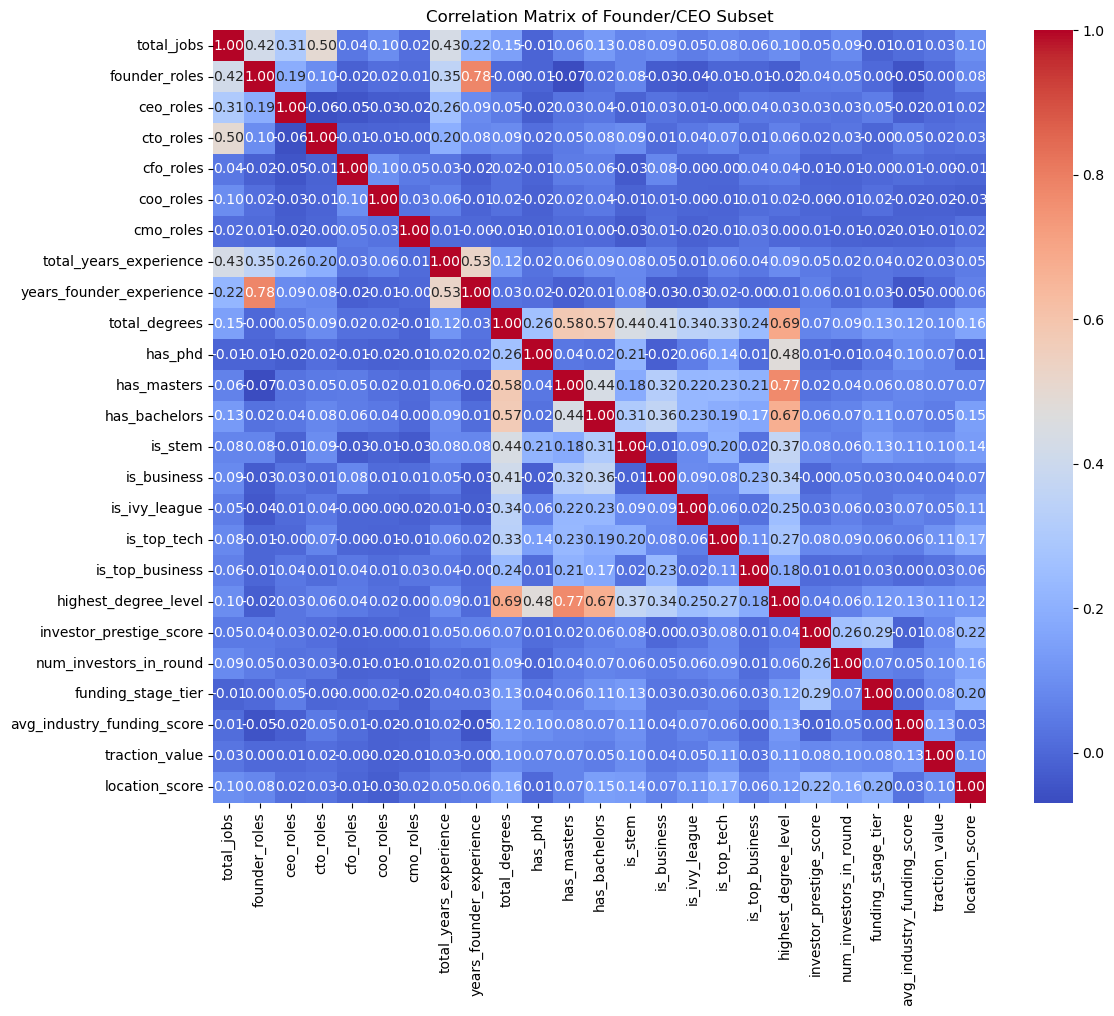

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Founder/CEO Subset")
plt.tight_layout()
plt.show()


In [146]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

In [147]:
df_founder_ceo['funding_stage_tier'].value_counts()

funding_stage_tier
0    6205
3    4834
1    2899
2    2559
Name: count, dtype: int64

In [148]:
missing_percent = (
    df_founder_ceo.isna().mean().sort_values(ascending=False) * 100
).round(2)

print(missing_percent[missing_percent > 0])  # Show only columns with missing values

num_investors_in_round    38.05
dtype: float64


In [149]:
mask = df_founder_ceo['num_investors_in_round'].isna()

df_founder_ceo.loc[mask, 'num_investors_in_round'] = np.where(
    df_founder_ceo.loc[mask, 'investor_prestige_score'] == 0,
    0,
    1
)


In [150]:
missing_percent = (
    df_founder_ceo.isna().mean().sort_values(ascending=False) * 100
).round(2)

print(missing_percent[missing_percent > 0])  # Show only columns with missing values

Series([], dtype: float64)


In [151]:
df_founder_ceo.head()

,total_jobs,founder_roles,ceo_roles,cto_roles,cfo_roles,coo_roles,cmo_roles,total_years_experience,years_founder_experience,total_degrees,has_phd,has_masters,has_bachelors,is_stem,is_business,is_ivy_league,is_top_tech,is_top_business,highest_degree_level,investor_prestige_score,num_investors_in_round,funding_stage_tier,avg_industry_funding_score,traction_value,location_score
2,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10,7.0,2,0.617201,56.0,9
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10,12.0,2,0.617201,56.0,9
5,3.0,2.0,2.0,0.0,0.0,0.0,0.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7.0,3,0.384539,0.0,1
22,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10,4.0,2,0.617201,56.0,9
23,2.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,10,13.0,2,0.617201,56.0,9


In [152]:
df_founder_ceo['num_investors_in_round'].value_counts()

num_investors_in_round
1.0     10395
2.0      1706
3.0      1124
4.0       897
5.0       619
6.0       461
7.0       346
8.0       263
9.0       178
10.0      153
12.0       72
11.0       65
13.0       52
14.0       36
15.0       26
16.0       24
17.0       19
19.0        9
18.0        9
20.0        8
26.0        5
24.0        5
23.0        3
21.0        3
22.0        2
67.0        2
37.0        2
33.0        2
27.0        2
82.0        1
35.0        1
97.0        1
25.0        1
41.0        1
43.0        1
38.0        1
28.0        1
53.0        1
Name: count, dtype: int64

In [153]:
X = df_founder_ceo.drop(columns=['funding_stage_tier'])
y = df_founder_ceo['funding_stage_tier']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [154]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    auto_class_weights='Balanced',
    random_state=42,
    verbose=0
)
model.fit(X_train, y_train)

In [155]:
# Create Pool object (optional but good practice with CatBoost)
pool = Pool(X_train, y_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)


In [156]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
y_pred = model.predict(X_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")




Accuracy: 0.580


In [159]:
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.677     0.882     0.766      1241
           1      0.328     0.283     0.304       580
           2      0.412     0.469     0.439       512
           3      0.692     0.430     0.531       967

    accuracy                          0.580      3300
   macro avg      0.527     0.516     0.510      3300
weighted avg      0.579     0.580     0.565      3300



In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Get probability predictions (n_samples x n_classes)
y_proba = model.predict_proba(X_test)

# Binarize the true labels (for OvR AUC)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])


In [161]:
# Macro average (treat all classes equally)
macro_auc = roc_auc_score(y_test_binarized, y_proba, average='macro', multi_class='ovr')

# Weighted average (accounts for class imbalance)
weighted_auc = roc_auc_score(y_test_binarized, y_proba, average='weighted', multi_class='ovr')

print(f"ROC AUC (macro):   {macro_auc:.3f}")
print(f"ROC AUC (weighted): {weighted_auc:.3f}")


ROC AUC (macro):   0.796
ROC AUC (weighted): 0.814


In [162]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Show original distribution
print("Original class distribution:", Counter(y_train))

# Define sampling strategy: target 6000 samples for classes 1, 2, 3
sampling_strategy = {
    1: 6000,
    2: 6000,
    3: 6000
    # Class 0 will be left unchanged
}

# Apply SMOTE only to underrepresented classes
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show new distribution
print("After SMOTE:", Counter(y_train_resampled))


Original class distribution: Counter({0: 4964, 3: 3867, 1: 2319, 2: 2047})
After SMOTE: Counter({1: 6000, 2: 6000, 3: 6000, 0: 4964})


In [163]:
model_smote = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    auto_class_weights=None,  # disable since SMOTE handled imbalance
    verbose=0
)

model_smote.fit(X_train_resampled, y_train_resampled)

In [164]:
y_pred_smote = model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote, digits=3))


Accuracy: 0.5960606060606061
Classification Report:
               precision    recall  f1-score   support

           0      0.680     0.890     0.771      1241
           1      0.334     0.240     0.279       580
           2      0.438     0.412     0.425       512
           3      0.659     0.531     0.588       967

    accuracy                          0.596      3300
   macro avg      0.528     0.518     0.516      3300
weighted avg      0.576     0.596     0.577      3300



In [169]:
# Get class probabilities
y_proba_smote = model_smote.predict_proba(X_test)

# Binarize y_test for One-vs-Rest AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

In [170]:
# Macro average: treats all classes equally
macro_auc = roc_auc_score(y_test_binarized, y_proba_smote, average='macro', multi_class='ovr')

# Weighted average: weights by support (class size)
weighted_auc = roc_auc_score(y_test_binarized, y_proba_smote, average='weighted', multi_class='ovr')

print(f"ROC AUC (macro):   {macro_auc:.3f}")
print(f"ROC AUC (weighted): {weighted_auc:.3f}")


ROC AUC (macro):   0.803
ROC AUC (weighted): 0.821


In [171]:
# AUC per class (returns 1 score per class)
per_class_auc = [
    roc_auc_score(y_test_binarized[:, i], y_proba_smote[:, i])
    for i in range(y_test_binarized.shape[1])
]

for i, score in enumerate(per_class_auc):
    print(f"AUC for class {i}: {score:.3f}")


AUC for class 0: 0.888
AUC for class 1: 0.723
AUC for class 2: 0.791
AUC for class 3: 0.810


In [181]:
# Ensure you're passing the right data type
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Rebuild the explainer
explainer = shap.TreeExplainer(model_smote)

# Compute SHAP values for multiclass
shap_values = explainer.shap_values(X_train_resampled_df)


In [179]:
# Should be: List of 4 arrays (one per class), each with shape (n_rows, n_features)
print(f"len(shap_values): {len(shap_values)}")
print(f"shap_values[0].shape: {shap_values[0].shape}")



len(shap_values): 22964
shap_values[0].shape: (24, 4)


In [176]:
shap.summary_plot(shap_values[1], X_train_resampled, plot_type="bar", show=True)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [177]:
print("SHAP shape:", shap_values[1].shape)
print("X shape:   ", X_train_resampled.shape)


SHAP shape: (24, 4)
X shape:    (22964, 24)


In [180]:
# Fix for SHAP analysis error and comprehensive model analysis

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Fix the SHAP analysis issue
def analyze_model_with_shap(model, X_train_resampled, X_test, y_test, feature_names):
    """
    Comprehensive SHAP analysis for the funding stage prediction model
    """
    
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for test set (use smaller sample if memory issues)
    sample_size = min(1000, len(X_test))
    X_sample = X_test.iloc[:sample_size] if hasattr(X_test, 'iloc') else X_test[:sample_size]
    
    print(f"Calculating SHAP values for {sample_size} samples...")
    shap_values = explainer.shap_values(X_sample)
    
    # Print shapes for debugging
    print(f"SHAP values shape: {np.array(shap_values).shape}")
    print(f"Sample data shape: {X_sample.shape}")
    print(f"Number of features: {len(feature_names)}")
    
    # Create summary plots
    plt.figure(figsize=(15, 10))
    
    # 1. Summary plot (beeswarm) for all classes
    plt.subplot(2, 2, 1)
    try:
        if isinstance(shap_values, list) and len(shap_values) > 1:
            # Multi-class case
            shap.summary_plot(shap_values, X_sample, 
                            feature_names=feature_names,
                            class_names=['Pre-Seed', 'Seed', 'Growth', 'Late-Stage'],
                            show=False, max_display=10)
        else:
            # Single class case
            shap.summary_plot(shap_values[0] if isinstance(shap_values, list) else shap_values, 
                            X_sample, feature_names=feature_names, show=False, max_display=10)
        plt.title('SHAP Summary Plot - Feature Importance')
    except Exception as e:
        print(f"Error creating summary plot: {e}")
        plt.text(0.5, 0.5, f'Summary plot error: {str(e)}', ha='center', va='center', transform=plt.gca().transAxes)
    
    # 2. Bar plot for feature importance (use class 1 - Seed stage)
    plt.subplot(2, 2, 2)
    try:
        if isinstance(shap_values, list) and len(shap_values) > 1:
            # Use seed stage (class 1) for bar plot
            class_idx = 1
            shap.summary_plot(shap_values[class_idx], X_sample, 
                            feature_names=feature_names,
                            plot_type="bar", show=False, max_display=10)
            plt.title(f'Feature Importance - Seed Stage (Class {class_idx})')
        else:
            shap.summary_plot(shap_values[0] if isinstance(shap_values, list) else shap_values, 
                            X_sample, feature_names=feature_names,
                            plot_type="bar", show=False, max_display=10)
            plt.title('Feature Importance - Bar Plot')
    except Exception as e:
        print(f"Error creating bar plot: {e}")
        plt.text(0.5, 0.5, f'Bar plot error: {str(e)}', ha='center', va='center', transform=plt.gca().transAxes)
    
    # 3. Confusion Matrix
    plt.subplot(2, 2, 3)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pre-Seed', 'Seed', 'Growth', 'Late-Stage'],
                yticklabels=['Pre-Seed', 'Seed', 'Growth', 'Late-Stage'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # 4. Feature importance from model
    plt.subplot(2, 2, 4)
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=True).tail(10)
        
        plt.barh(range(len(feature_importance)), feature_importance['importance'])
        plt.yticks(range(len(feature_importance)), feature_importance['feature'])
        plt.title('Model Feature Importance (Top 10)')
        plt.xlabel('Importance')
    else:
        plt.text(0.5, 0.5, 'Feature importance not available', ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()
    
    return shap_values, explainer

# Function to create detailed performance analysis
def detailed_performance_analysis(model, X_test, y_test, feature_names):
    """
    Create detailed performance analysis including class-wise metrics
    """
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Class names
    class_names = ['Pre-Seed (0)', 'Seed (1)', 'Growth (2)', 'Late-Stage (3)']
    
    print("=== DETAILED PERFORMANCE ANALYSIS ===\n")
    
    # Overall metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Class distribution
    print("\nClass Distribution in Test Set:")
    test_dist = pd.Series(y_test).value_counts().sort_index()
    pred_dist = pd.Series(y_pred).value_counts().sort_index()
    
    dist_df = pd.DataFrame({
        'Actual': test_dist,
        'Predicted': pred_dist
    })
    print(dist_df)
    
    # Top features analysis
    if hasattr(model, 'feature_importances_'):
        print("\nTop 10 Most Important Features:")
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False).head(10)
        
        for idx, row in feature_importance.iterrows():
            print(f"{row['Feature']}: {row['Importance']:.4f}")
    
    # Prediction confidence analysis
    print("\nPrediction Confidence Analysis:")
    max_probas = np.max(y_pred_proba, axis=1)
    confidence_stats = pd.DataFrame({
        'Confidence_Level': ['Very High (>0.8)', 'High (0.6-0.8)', 'Medium (0.4-0.6)', 'Low (<0.4)'],
        'Count': [
            np.sum(max_probas > 0.8),
            np.sum((max_probas >= 0.6) & (max_probas <= 0.8)),
            np.sum((max_probas >= 0.4) & (max_probas < 0.6)),
            np.sum(max_probas < 0.4)
        ]
    })
    confidence_stats['Percentage'] = (confidence_stats['Count'] / len(y_test) * 100).round(2)
    print(confidence_stats.to_string(index=False))
    
    return y_pred, y_pred_proba

# Function to analyze misclassified cases
def analyze_misclassifications(X_test, y_test, y_pred, feature_names, n_examples=5):
    """
    Analyze misclassified examples to understand model limitations
    """
    
    misclassified_idx = np.where(y_test != y_pred)[0]
    
    print(f"\n=== MISCLASSIFICATION ANALYSIS ===")
    print(f"Total misclassified: {len(misclassified_idx)} out of {len(y_test)} ({len(misclassified_idx)/len(y_test)*100:.2f}%)")
    
    # Sample some misclassified cases
    sample_idx = np.random.choice(misclassified_idx, min(n_examples, len(misclassified_idx)), replace=False)
    
    print(f"\nSample of {len(sample_idx)} misclassified cases:")
    
    class_names = {0: 'Pre-Seed', 1: 'Seed', 2: 'Growth', 3: 'Late-Stage'}
    
    for i, idx in enumerate(sample_idx):
        print(f"\nCase {i+1}:")
        print(f"  Actual: {class_names[y_test.iloc[idx]]} | Predicted: {class_names[y_pred[idx]]}")
        
        # Show top features for this case
        case_data = X_test.iloc[idx]
        top_features = case_data.abs().nlargest(5)
        
        print("  Key features:")
        for feature, value in top_features.items():
            print(f"    {feature}: {value}")

# Example usage (replace with your actual variables):
"""
# Assuming you have these variables from your model training:
# model, X_train_resampled, X_test, y_test, feature_names

# Run the analysis
try:
    shap_values, explainer = analyze_model_with_shap(
        model, X_train_resampled, X_test, y_test, feature_names
    )
    
    y_pred, y_pred_proba = detailed_performance_analysis(
        model, X_test, y_test, feature_names
    )
    
    analyze_misclassifications(
        X_test, y_test, y_pred, feature_names, n_examples=3
    )
    
except Exception as e:
    print(f"Error in analysis: {e}")
    print("Please check your variable names and data shapes")
"""

# Alternative simpler SHAP analysis if the above fails
def simple_shap_analysis(model, X_sample, feature_names, max_features=10):
    """
    Simplified SHAP analysis that's more robust to shape issues
    """
    try:
        # Create explainer
        explainer = shap.TreeExplainer(model)
        
        # Use smaller sample to avoid memory issues
        sample_size = min(100, len(X_sample))
        X_small = X_sample.iloc[:sample_size] if hasattr(X_sample, 'iloc') else X_sample[:sample_size]
        
        # Calculate SHAP values
        shap_values = explainer.shap_values(X_small)
        
        # Create simple feature importance plot
        if isinstance(shap_values, list):
            # Multi-class - use mean absolute SHAP values across all classes
            mean_shap = np.mean([np.abs(sv).mean(0) for sv in shap_values], axis=0)
        else:
            mean_shap = np.abs(shap_values).mean(0)
        
        # Create feature importance dataframe
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'SHAP_Importance': mean_shap
        }).sort_values('SHAP_Importance', ascending=False).head(max_features)
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance_df)), importance_df['SHAP_Importance'])
        plt.yticks(range(len(importance_df)), importance_df['Feature'])
        plt.xlabel('Mean |SHAP Value|')
        plt.title('Feature Importance (SHAP)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        return importance_df
        
    except Exception as e:
        print(f"SHAP analysis failed: {e}")
        return None

print("SHAP analysis functions loaded successfully!")
print("\nTo use:")
print("1. analyze_model_with_shap() - Comprehensive analysis")
print("2. simple_shap_analysis() - Simpler, more robust version")
print("3. detailed_performance_analysis() - Performance metrics")
print("4. analyze_misclassifications() - Error analysis")

SHAP analysis functions loaded successfully!

To use:
1. analyze_model_with_shap() - Comprehensive analysis
2. simple_shap_analysis() - Simpler, more robust version
3. detailed_performance_analysis() - Performance metrics
4. analyze_misclassifications() - Error analysis


In [184]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # handles imbalance like CatBoost's auto_class_weights
)

rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.706
              precision    recall  f1-score   support

           0      0.775     0.780     0.778      1241
           1      0.446     0.455     0.451       580
           2      0.537     0.504     0.520       512
           3      0.859     0.870     0.864       967

    accuracy                          0.706      3300
   macro avg      0.654     0.652     0.653      3300
weighted avg      0.705     0.706     0.706      3300



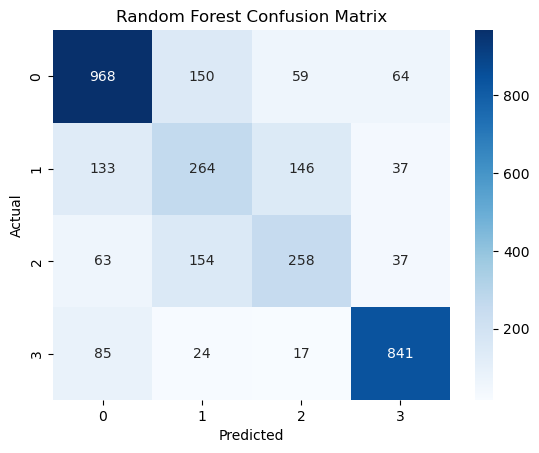

In [185]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

# Classification report
print(classification_report(y_test, y_pred_rf, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [187]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Show top 10
sorted_idx = importances.argsort()[::-1]
for i in sorted_idx[:15]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


avg_industry_funding_score: 0.1933
num_investors_in_round: 0.1583
total_years_experience: 0.0731
traction_value: 0.0664
location_score: 0.0624
years_founder_experience: 0.0569
total_degrees: 0.0487
total_jobs: 0.0473
ceo_roles: 0.0414
investor_prestige_score: 0.0291
cto_roles: 0.0282
founder_roles: 0.0280
highest_degree_level: 0.0275
is_stem: 0.0269
is_business: 0.0227


In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities
y_proba_rf = rf_model.predict_proba(X_test)

# Binarize y_test for multiclass AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])


In [189]:
# Macro average (treats all classes equally)
macro_auc = roc_auc_score(y_test_binarized, y_proba_rf, average='macro', multi_class='ovr')

# Weighted average (weights by class frequency)
weighted_auc = roc_auc_score(y_test_binarized, y_proba_rf, average='weighted', multi_class='ovr')

print(f"Random Forest ROC AUC (macro):   {macro_auc:.3f}")
print(f"Random Forest ROC AUC (weighted): {weighted_auc:.3f}")


Random Forest ROC AUC (macro):   0.863
Random Forest ROC AUC (weighted): 0.882


In [190]:
import os
import mlflow
import mlflow.sklearn
import mlflow.catboost
from dotenv import load_dotenv

# Load .env with tracking URI, username, and password
load_dotenv()

# Set tracking URI
mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URI"))

# Optional: Verify connection
print(f"Connected to MLflow at: {mlflow.get_tracking_uri()}")

Connected to MLflow at: https://ml.cloud.playbook.vc


In [193]:
EXPERIMENT_NAME = "PnP_Founder_Quality_Models"
mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1752045276067, experiment_id='3', last_update_time=1752045276067, lifecycle_stage='active', name='PnP_Founder_Quality_Models', tags={'objective': 'Predict founder success without circular logic',
 'project': 'PnP Founder Scoring',
 'team': 'LMU MSBA Capstone'}>

In [194]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize

with mlflow.start_run(run_name="CatBoost_SMOTE"):

    # Log parameters
    mlflow.log_param("model_type", "CatBoost")
    mlflow.log_param("use_smote", True)
    mlflow.log_param("iterations", model_smote.get_param('iterations'))
    mlflow.log_param("learning_rate", model_smote.get_param('learning_rate'))
    mlflow.log_param("depth", model_smote.get_param('depth'))

    # Predictions and metrics
    y_pred_cb = model_smote.predict(X_test)
    y_proba_cb = model_smote.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=[0,1,2,3])

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_cb))
    mlflow.log_metric("roc_auc_macro", roc_auc_score(y_test_bin, y_proba_cb, average="macro", multi_class="ovr"))
    mlflow.log_metric("roc_auc_weighted", roc_auc_score(y_test_bin, y_proba_cb, average="weighted", multi_class="ovr"))

    # Save model to MLflow
    mlflow.catboost.log_model(model_smote, artifact_path="catboost_model")


2025/07/14 17:12:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run CatBoost_SMOTE at: https://ml.cloud.playbook.vc/#/experiments/3/runs/5aea0ebcfcb14332835f0ee6dd52ba5c
🧪 View experiment at: https://ml.cloud.playbook.vc/#/experiments/3


In [195]:
# Retrain on SMOTE-resampled dataset
rf_model_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight=None  # SMOTE handled balancing, so no need here
)

rf_model_smote.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [196]:
with mlflow.start_run(run_name="RandomForest_SMOTE"):

    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("n_estimators", rf_model_smote.n_estimators)
    mlflow.log_param("max_depth", rf_model_smote.max_depth)
    mlflow.log_param("class_weight", "None (SMOTE)")

    # Predictions on original test set
    y_pred_rf_smote = rf_model_smote.predict(X_test)
    y_proba_rf_smote = rf_model_smote.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=[0,1,2,3])

    # Metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_rf_smote))
    mlflow.log_metric("roc_auc_macro", roc_auc_score(y_test_bin, y_proba_rf_smote, average="macro", multi_class="ovr"))
    mlflow.log_metric("roc_auc_weighted", roc_auc_score(y_test_bin, y_proba_rf_smote, average="weighted", multi_class="ovr"))

    # Save model to MLflow
    mlflow.sklearn.log_model(rf_model_smote, artifact_path="random_forest_model_smote")


2025/07/14 17:13:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_SMOTE at: https://ml.cloud.playbook.vc/#/experiments/3/runs/cc32d9f677b7425592076b73f6de6ed2
🧪 View experiment at: https://ml.cloud.playbook.vc/#/experiments/3


MlflowException: API request to https://ml.cloud.playbook.vc/api/2.0/mlflow-artifacts/artifacts/3/cc32d9f677b7425592076b73f6de6ed2/artifacts/random_forest_model_smote/model.pkl failed with exception HTTPSConnectionPool(host='ml.cloud.playbook.vc', port=443): Max retries exceeded with url: /api/2.0/mlflow-artifacts/artifacts/3/cc32d9f677b7425592076b73f6de6ed2/artifacts/random_forest_model_smote/model.pkl (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:2427)')))